In [1]:
import pandas as pd

In [3]:
five_hz_clear: pd.DataFrame = pd.read_csv("./data/FlickerLine_5Hz_Clear.csv", skiprows=1)
five_hz_clear

,timestamp,x,y,polarity
0,1672940686094939,38,158,0
1,1672940686094939,55,5,0
2,1672940686094939,65,156,0
3,1672940686094939,102,296,1
4,1672940686094939,131,47,1
...,...,...,...,...
1220084,1672940691754655,565,138,1
1220085,1672940691754655,567,406,0
1220086,1672940691754655,586,140,1
1220087,1672940691754655,591,140,1


In [10]:
five_hz_clear_with_polarity = five_hz_clear[five_hz_clear["polarity"] == 1].reset_index(drop=True)
five_hz_clear_without_polarity = five_hz_clear[five_hz_clear["polarity"] == 0].reset_index(drop=True)
five_hz_clear_with_polarity

,timestamp,x,y,polarity
0,1672940686094939,102,296,1
1,1672940686094939,131,47,1
2,1672940686094939,362,282,1
3,1672940686094939,505,474,1
4,1672940686094939,578,6,1
...,...,...,...,...
642483,1672940691754655,555,140,1
642484,1672940691754655,565,138,1
642485,1672940691754655,586,140,1
642486,1672940691754655,591,140,1


In [27]:
five_hz_clear_with_polarity = five_hz_clear_with_polarity[(five_hz_clear_with_polarity["y"] > 140) &
                                                         (five_hz_clear_with_polarity["y"] > 160)]
five_hz_clear_with_polarity

,timestamp,x,y,polarity
0,1672940686094939,102,296,1
2,1672940686094939,362,282,1
3,1672940686094939,505,474,1
5,1672940686094939,612,321,1
6,1672940686095128,0,318,1
...,...,...,...,...
642469,1672940691754655,113,247,1
642475,1672940691754655,352,263,1
642477,1672940691754655,395,425,1
642481,1672940691754655,502,340,1


In [28]:
import math
max_r = np.sqrt(math.pow(480, 2) + math.pow(640, 2))
max_r

800.0

array([[4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 4, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

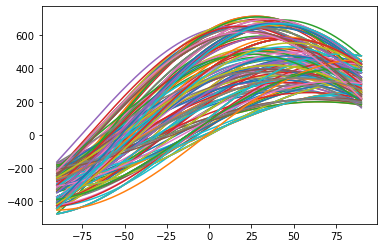

In [38]:
import numpy as np
import matplotlib.pyplot as plt
theta = np.arange(-90, 90, 0.1)
matrix = np.zeros((800, len(theta)), dtype=np.uint8)

for index in range(len(five_hz_clear_with_polarity[:200])):
    x = five_hz_clear_with_polarity.iloc[index, 1]
    y = five_hz_clear_with_polarity.iloc[index, 2]
    r_list = []
    r = x*np.cos(np.deg2rad(theta)) + y*np.sin(np.deg2rad(theta))
    r_list.append(r)
    plt.plot(theta, r)
    for theta_index in range(len(theta)):
        rho = int(x*np.cos(theta_index) + y*np.sin(theta_index)) 
        matrix[rho, theta_index] += 1
matrix

 ...]

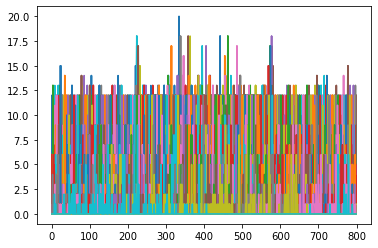

In [39]:
plt.figure()
plt.plot(matrix)

In [26]:
r_list[0]

array([-318.        , -317.99951566, -317.99806264, ...,  317.99564093,
        317.99806264,  317.99951566])

In [ ]:
rho_step = 5
phi_step = 20 * np.pi/180

In [23]:
matrix = np.zeros((len(theta), 800))
matrix.shape

(1800, 800)

In [16]:
five_hz_clear_with_polarity["x"].describe()

count    642488.000000
mean        297.924663
std         176.553971
min           0.000000
25%         151.000000
50%         283.000000
75%         440.000000
max         639.000000
Name: x, dtype: float64

In [9]:
five_hz_clear_with_polarity["y"].describe()

count    642488.000000
mean        178.253547
std          96.292373
min           0.000000
25%         140.000000
50%         146.000000
75%         159.000000
max         479.000000
Name: y, dtype: float64

In [7]:
specific_timestamp = five_hz_clear_with_polarity[five_hz_clear_with_polarity["timestamp"] == 1672940686094939].reset_index(drop=True)
specific_timestamp

,timestamp,x,y,polarity
0,1672940686094939,102,296,1
1,1672940686094939,131,47,1
2,1672940686094939,362,282,1
3,1672940686094939,505,474,1
4,1672940686094939,578,6,1
5,1672940686094939,612,321,1
